In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\saqla\Desktop\Python Certification for Data Science\Case Studies\Module 8\Datasets\breast-cancer-data.csv",index_col='id')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
y = df['diagnosis']
x = df.drop(columns=['diagnosis'])

## PCA

In [4]:
pca = PCA(n_components=2)

pca.fit(x)
(pca.explained_variance_ratio_).sum()

0.9982211613741725

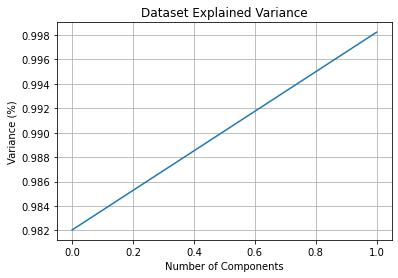

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()

### Transform the data

In [6]:
x.shape

(569, 30)

In [7]:
x_transformed = pca.transform(x)

In [8]:
x_transformed.shape

(569, 2)

In [9]:
x_transformed = pd.DataFrame(x_transformed,columns=['PC1','PC2'])
x_transformed

,PC1,PC2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742
...,...,...
564,1414.126684,110.222492
565,1045.018854,77.057589
566,314.501756,47.553525
567,1124.858115,34.129225


In [10]:
x_transformed.set_index(df.index,inplace=True)

In [11]:
x_transformed['diagnosis'] = y

### Transformed Dataset

In [12]:
x_transformed

,PC1,PC2,diagnosis
id,,,
842302,1160.142574,-293.917544,M
842517,1269.122443,15.630182,M
84300903,995.793889,39.156743,M
84348301,-407.180803,-67.380320,M
84358402,930.341180,189.340742,M
...,...,...,...
926424,1414.126684,110.222492,M
926682,1045.018854,77.057589,M
926954,314.501756,47.553525,M
